# Trabalho de Implementação 2

**<font color='red'>Discipline: CMP197 - Introdução à Visão Computacional</font>**

Professor:

- Cláudio Jung

Authors:
- Lucas Nedel Kirsten, 230262
- Diego Severo Jardim, 319862

## Importing the necessary libraries

In [1]:
from time import time
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread

from utils.block_matching import compute_ssd, compute_aggregation
from utils.plot_utils import plot_images

## Setting global parameters

In [2]:
max_disp_steps = 50  # maximum disparity to consider

window_sizes = [1, 3, 5, 7, 11, 15, 21]
window_size = 7  # size of the window to consider around the scan line point

apply_dist = True
penalty = 100

# left_img_path = "../data/Teddy/teddy-png-2/im2.png"
# right_img_path = "../data/Teddy/teddy-png-2/im6.png"
left_img_path = "../data/Cones/cones-png-2/im2.png"
right_img_path = "../data/Cones/cones-png-2/im6.png"

left_img = imread(left_img_path)
right_img = imread(right_img_path)

## Task 1

### Task 1A

SSD time: 5.52 s


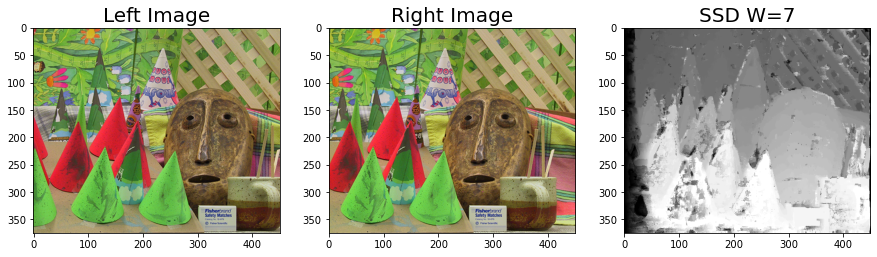

In [3]:
# Computing Block Matching using SSD
init = time()
costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=False)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

print(f'SSD time: {(time() - init):.2f} s')

plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map1_title=f"SSD W={window_size}")

### Task 1B

SSD time: 7.25 s
Using penalty of 100


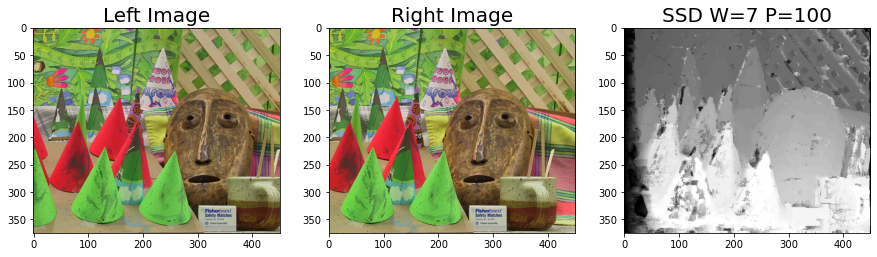

In [4]:
# Computing Block Matching using SSD + Penalty value
init = time()
costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=True,
                     penalty=penalty)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

print(f'SSD time: {(time() - init):.2f} s')

print(f"Using penalty of {penalty}")
plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map1_title=f"SSD W={window_size} P={penalty}")

### Looping over neighborhood

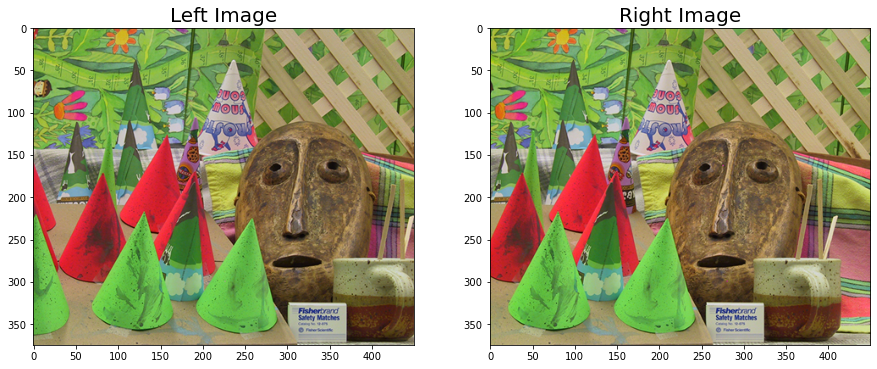

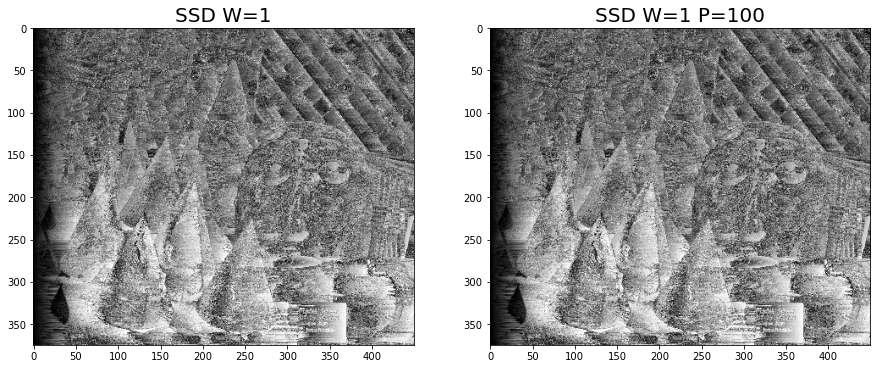

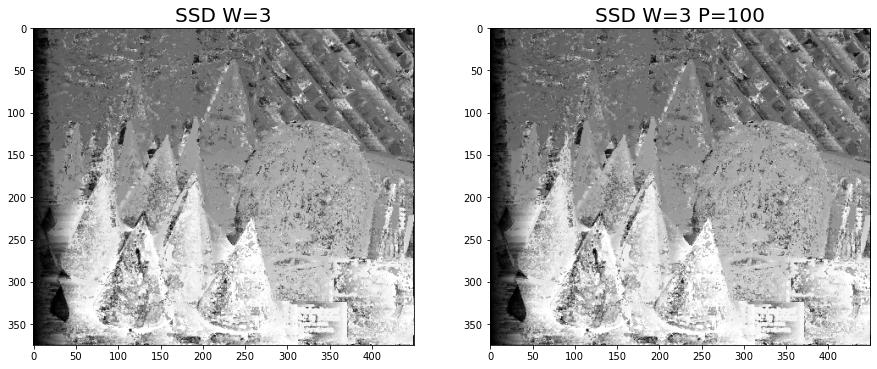

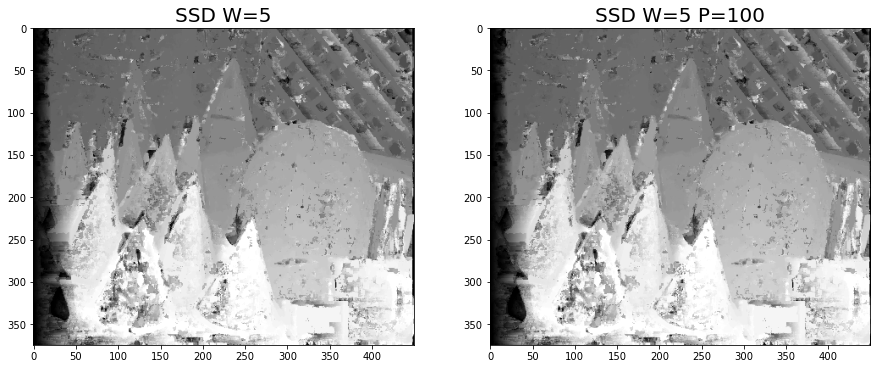

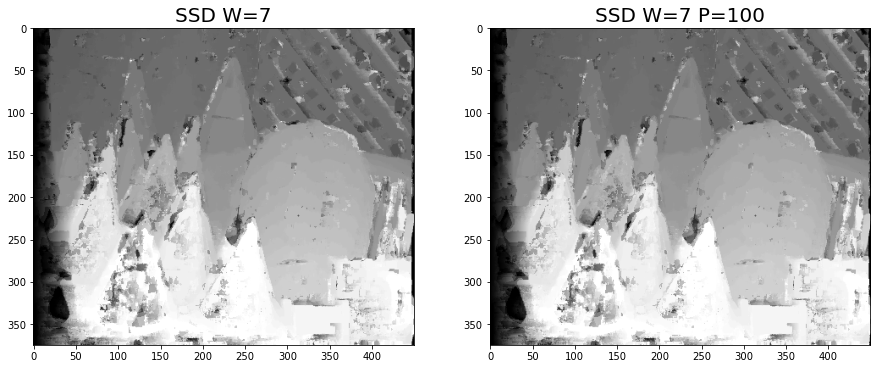

In [ ]:
init = time()

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Left Image", size=20)
ax1.imshow(left_img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Right Image", size=20)
ax2.imshow(right_img)
plt.show()

for window_size in window_sizes:
    costs0 = compute_ssd(left_image=left_img,
                         right_image=right_img,
                         disparities=max_disp_steps,
                         window_size=window_size,
                         apply_dist=False)
    costs0_pen = compute_ssd(left_image=left_img,
                             right_image=right_img,
                             disparities=max_disp_steps,
                             window_size=window_size,
                             apply_dist=True,
                             penalty=penalty)
    min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)
    min_cost_pen = np.mean(np.argmin(costs0_pen, axis=-1), axis=-1)
    
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title(f"SSD W={window_size}", size=20)
    ax1.imshow(min_cost, cmap='gray')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title(f"SSD W={window_size} P={penalty}", size=20)
    ax2.imshow(min_cost_pen, cmap='gray')
    plt.show()
    
    del(costs0)
    del(costs0_pen)
    del(min_cost)
    del(min_cost_pen)
    
print(f'Elapsed time: {(time() - init):.2f} s')

## Task 2

### Task 2A

In [ ]:
# Computing Block Matching using SSD + Mean Aggregation
init = time()

costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=False)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

mean_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='mean')
min_cost_mean_agg = np.mean(np.argmin(mean_agg, axis=-1), axis=-1)

print(f'Mean Aggregation time: {(time() - init):.2f} s')

plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map2=min_cost_mean_agg,
            disp_map1_title=f"SSD W={window_size}",
            disp_map2_title=f"SSD + Mean Agg W={window_size}")

In [ ]:
# Computing Block Matching using SSD + Penalty value + Mean Aggregation
init = time()

costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=True,
                     penalty=penalty)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

mean_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='mean')
min_cost_mean_agg = np.mean(np.argmin(mean_agg, axis=-1), axis=-1)

print(f'Mean Aggregation time: {(time() - init):.2f} s')

plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map2=min_cost_mean_agg,
            disp_map1_title=f"SSD W={window_size} P={penalty}",
            disp_map2_title=f"SSD + Mean Agg W={window_size} P={penalty}")

### Task 2B

In [ ]:
# Computing Block Matching using SSD + Median Aggregation
init = time()

costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=False)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

median_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='median')
min_cost_median_agg = np.mean(np.argmin(median_agg, axis=-1), axis=-1)

print(f'Median Aggregation time: {(time() - init):.2f} s')

plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map2=min_cost_median_agg,
            disp_map1_title=f"SSD W={window_size}",
            disp_map2_title=f"SSD + Median Agg W={window_size}")

In [ ]:
# Computing Block Matching using SSD + Penalty value + Median Aggregation
init = time()

costs0 = compute_ssd(left_image=left_img,
                     right_image=right_img,
                     disparities=max_disp_steps,
                     window_size=window_size,
                     apply_dist=True,
                     penalty=penalty)
min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)

median_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='median')
min_cost_median_agg = np.mean(np.argmin(median_agg, axis=-1), axis=-1)

print(f'Median Aggregation time: {(time() - init):.2f} s')

print(f"Using penalty of {penalty}")
plot_images(imageL=left_img,
            imageR=right_img,
            disp_map1=min_cost,
            disp_map2=min_cost_median_agg,
            disp_map1_title=f"SSD W={window_size} P={penalty}",
            disp_map2_title=f"SSD + Median Agg W={window_size} P={penalty}")

### Looping over neighborhood

In [ ]:
init = time()

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Left Image", size=20)
ax1.imshow(left_img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Right Image", size=20)
ax2.imshow(right_img)
plt.show()

for window_size in window_sizes:
    costs0 = compute_ssd(left_image=left_img,
                         right_image=right_img,
                         disparities=max_disp_steps,
                         window_size=window_size,
                         apply_dist=False)
    min_cost = np.mean(np.argmin(costs0, axis=-1), axis=-1)
    mean_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='mean')
    min_cost_mean_agg = np.mean(np.argmin(mean_agg, axis=-1), axis=-1)
    
    costs0_pen = compute_ssd(left_image=left_img,
                             right_image=right_img,
                             disparities=max_disp_steps,
                             window_size=window_size,
                             apply_dist=True,
                             penalty=penalty)
    min_cost_pen = np.mean(np.argmin(costs0_pen, axis=-1), axis=-1)
    mean_agg_pen = compute_aggregation(costs0=costs0_pen, window_size=window_size, mode='mean')
    min_cost_mean_agg_pen = np.mean(np.argmin(mean_agg_pen, axis=-1), axis=-1)

    median_agg = compute_aggregation(costs0=costs0, window_size=window_size, mode='median')
    min_cost_median_agg = np.mean(np.argmin(median_agg, axis=-1), axis=-1)
    
    median_agg_pen = compute_aggregation(costs0=costs0_pen, window_size=window_size, mode='median')
    min_cost_median_agg_pen = np.mean(np.argmin(median_agg_pen, axis=-1), axis=-1)
    
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_title(f"SSD + Mean Agg | W={window_size}", size=20)
    ax1.imshow(min_cost_mean_agg, cmap='gray')
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set_title(f"SSD + Mean Agg | W={window_size} | P={penalty}", size=20)
    ax2.imshow(min_cost_mean_agg_pen, cmap='gray')
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set_title(f"SSD + Median Agg | W={window_size}", size=20)
    ax3.imshow(disp_map1, cmap='gray')
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_title(f"SSD + Median Agg | W={window_size} | P={penalty}", size=20)
    ax4.imshow(disp_map2, cmap='gray')
    plt.show()
    
    del(costs0)
    del(min_cost)
    del(mean_agg)
    del(min_cost_mean_agg)
    
    del(costs0_pen)
    del(min_cost_pen)
    del(mean_agg_pen)
    del(min_cost_mean_agg_pen)
    
    del(median_agg)
    del(min_cost_median_agg)
    del(median_agg_pen)
    del(min_cost_median_agg_pen)

print(f'Elapsed time: {(time() - init):.2f} s')